# **Heart Disease Prediction**

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

: 

In [2]:
data= pd.read_csv('heart.csv')

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df=data.copy(deep=True)

# **Data Cleaning**

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
df.columns=['yas','cinsiyyet','sine_agrisi','istirahet_halinda_qan_tezyiqi','xolesterol',
          'acqar_qan_sekeri_120_ustudurmu','ritm_pozgunlugu_varmi',
          '1_deqiqedeki_max_doyuntu_sayi','fiziki_fealiyyetle_bagli_angina',
          'oldpeak','slope','fluoroskopiya_zamani_gorunen_damarlarin_sayi', 'stres_testi_neticesi',
          'insan_urek_xestesidirmi'
            ]

In [7]:
df[df<0].count() # 0dan kicik olan deyerlerin sayi sutunlar uzre

,0
yas,0
cinsiyyet,0
sine_agrisi,0
istirahet_halinda_qan_tezyiqi,0
xolesterol,0
acqar_qan_sekeri_120_ustudurmu,0
ritm_pozgunlugu_varmi,0
1_deqiqedeki_max_doyuntu_sayi,0
fiziki_fealiyyetle_bagli_angina,0
oldpeak,0


In [8]:
# daha boyuk melumata baxmaq ucun ( meselen null deyerler, toplam data sayi, dtypelar , memory usage)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   yas                                           303 non-null    int64  
 1   cinsiyyet                                     303 non-null    int64  
 2   sine_agrisi                                   303 non-null    int64  
 3   istirahet_halinda_qan_tezyiqi                 303 non-null    int64  
 4   xolesterol                                    303 non-null    int64  
 5   acqar_qan_sekeri_120_ustudurmu                303 non-null    int64  
 6   ritm_pozgunlugu_varmi                         303 non-null    int64  
 7   1_deqiqedeki_max_doyuntu_sayi                 303 non-null    int64  
 8   fiziki_fealiyyetle_bagli_angina               303 non-null    int64  
 9   oldpeak                                       303 non-null    flo

In [9]:
# ancaq data tiplere baxmaq ucun
df.dtypes

,0
yas,int64
cinsiyyet,int64
sine_agrisi,int64
istirahet_halinda_qan_tezyiqi,int64
xolesterol,int64
acqar_qan_sekeri_120_ustudurmu,int64
ritm_pozgunlugu_varmi,int64
1_deqiqedeki_max_doyuntu_sayi,int64
fiziki_fealiyyetle_bagli_angina,int64
oldpeak,float64


In [10]:
df[df.duplicated(keep=False)]

,yas,cinsiyyet,sine_agrisi,istirahet_halinda_qan_tezyiqi,xolesterol,acqar_qan_sekeri_120_ustudurmu,ritm_pozgunlugu_varmi,1_deqiqedeki_max_doyuntu_sayi,fiziki_fealiyyetle_bagli_angina,oldpeak,slope,fluoroskopiya_zamani_gorunen_damarlarin_sayi,stres_testi_neticesi,insan_urek_xestesidirmi
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [11]:
df.drop_duplicates(inplace=True)

# Exploratory Data Analysis

In [12]:
df['insan_urek_xestesidirmi'].value_counts() # data imbalance deyil, yaxşıdır

,count
insan_urek_xestesidirmi,
1,164
0,138


In [13]:
df['yas'].value_counts()

,count
yas,
58,19
57,17
54,16
59,14
52,13
51,12
62,11
56,11
44,11


<Axes: xlabel='yas', ylabel='Count'>

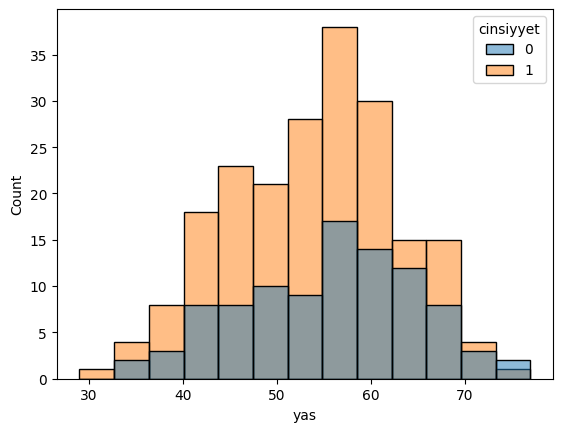

In [14]:
sns.histplot(x=df['yas'], color='orange', hue=df['cinsiyyet'])

In [15]:
df['cinsiyyet'].value_counts()

,count
cinsiyyet,
1,206
0,96


In [16]:
#1- kisi, 2- qadin

In [17]:
df['fluoroskopiya_zamani_gorunen_damarlarin_sayi'].value_counts()

,count
fluoroskopiya_zamani_gorunen_damarlarin_sayi,
0,175
1,65
2,38
3,20
4,4


<Axes: xlabel='insan_urek_xestesidirmi', ylabel='fluoroskopiya_zamani_gorunen_damarlarin_sayi'>

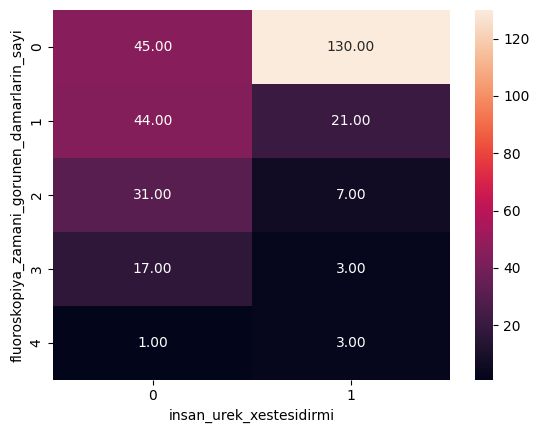

In [18]:
coorelation= pd.crosstab(df['fluoroskopiya_zamani_gorunen_damarlarin_sayi'],df['insan_urek_xestesidirmi'])
sns.heatmap(coorelation, annot=True, fmt=',.2f')

<Axes: xlabel='fluoroskopiya_zamani_gorunen_damarlarin_sayi', ylabel='count'>

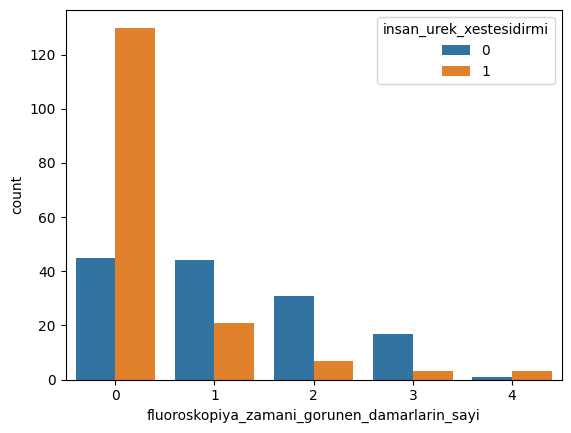

In [19]:
sns.countplot(x=df['fluoroskopiya_zamani_gorunen_damarlarin_sayi'], hue=df['insan_urek_xestesidirmi'])

In [20]:

df.head(3)

,yas,cinsiyyet,sine_agrisi,istirahet_halinda_qan_tezyiqi,xolesterol,acqar_qan_sekeri_120_ustudurmu,ritm_pozgunlugu_varmi,1_deqiqedeki_max_doyuntu_sayi,fiziki_fealiyyetle_bagli_angina,oldpeak,slope,fluoroskopiya_zamani_gorunen_damarlarin_sayi,stres_testi_neticesi,insan_urek_xestesidirmi
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


<Axes: xlabel='xolesterol', ylabel='Count'>

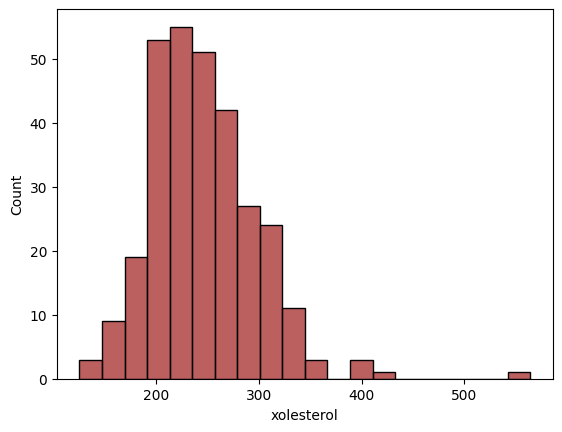

In [21]:
sns.histplot(df['xolesterol'], color='brown', bins=20)

500-ə yaxın dəyəri atmıram, realda bu ola bilər.


array([  0. ,  28.2,  56.4,  84.6, 112.8, 141. , 169.2, 197.4, 225.6,
       253.8, 282. , 310.2, 338.4, 366.6, 394.8, 423. , 451.2, 479.4,
       507.6, 535.8, 564. ])

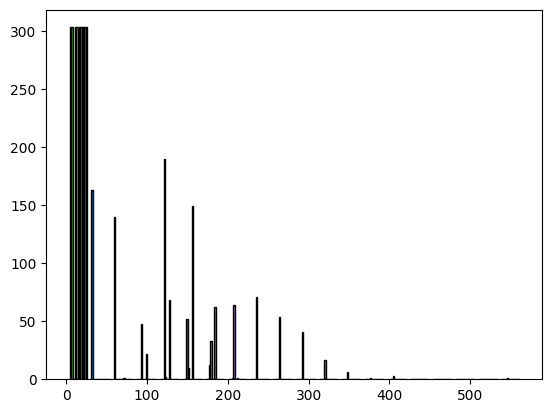

In [22]:
# Histogram və bin sərhədlərini əldə etmək
n, bins, patches = plt.hist(data, bins=20, edgecolor='black')

bins

In [23]:
df[df['xolesterol']>423]

,yas,cinsiyyet,sine_agrisi,istirahet_halinda_qan_tezyiqi,xolesterol,acqar_qan_sekeri_120_ustudurmu,ritm_pozgunlugu_varmi,1_deqiqedeki_max_doyuntu_sayi,fiziki_fealiyyetle_bagli_angina,oldpeak,slope,fluoroskopiya_zamani_gorunen_damarlarin_sayi,stres_testi_neticesi,insan_urek_xestesidirmi
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1


Text(0.5, 1.0, 'Xolesterol deyerleri ucun histogram')

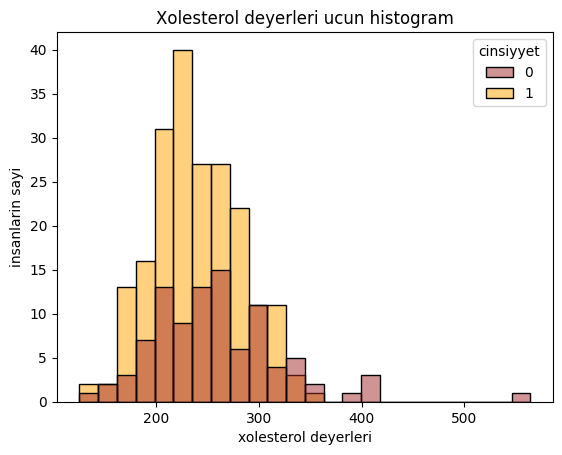

In [24]:
sns.histplot(x=df['xolesterol'] , hue=df['cinsiyyet'], palette=['brown','orange'])
plt.xlabel('xolesterol deyerleri')
plt.ylabel('insanlarin sayi')
plt.title('Xolesterol deyerleri ucun histogram')

In [25]:
#netice cixara bilerik ki, yuksek xolesterol deyerleri qadinlarda daha coxdur kisilere nisbetde datasete esasen

In [26]:
df['sine_agrisi'].value_counts()

,count
sine_agrisi,
0,143
2,86
1,50
3,23


<Axes: xlabel='insan_urek_xestesidirmi', ylabel='sine_agrisi'>

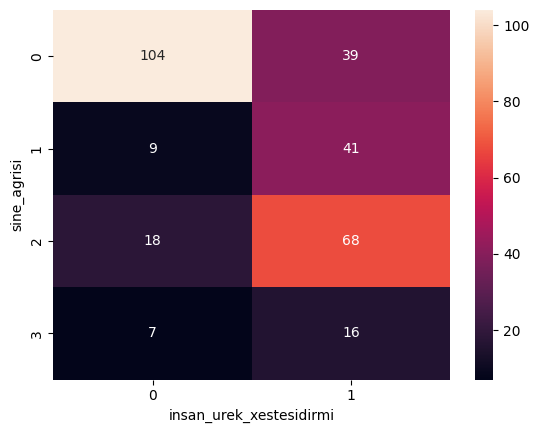

In [27]:
crosstab = pd.crosstab(df['sine_agrisi'], df['insan_urek_xestesidirmi'])

# Heatmap yaratmaq
sns.heatmap(crosstab, annot=True, fmt=',.0f')

In [28]:
#sinə agrisi olmayan insanlarda daha cox urek xesteliyi de olmur.

In [29]:
df.head(3)

,yas,cinsiyyet,sine_agrisi,istirahet_halinda_qan_tezyiqi,xolesterol,acqar_qan_sekeri_120_ustudurmu,ritm_pozgunlugu_varmi,1_deqiqedeki_max_doyuntu_sayi,fiziki_fealiyyetle_bagli_angina,oldpeak,slope,fluoroskopiya_zamani_gorunen_damarlarin_sayi,stres_testi_neticesi,insan_urek_xestesidirmi
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


<Axes: xlabel='istirahet_halinda_qan_tezyiqi', ylabel='Count'>

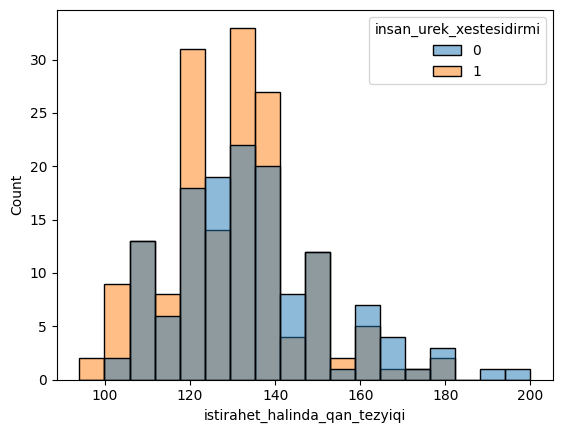

In [30]:
sns.histplot(x=df['istirahet_halinda_qan_tezyiqi'], hue=df['insan_urek_xestesidirmi'])

In [31]:
df.head(3)

,yas,cinsiyyet,sine_agrisi,istirahet_halinda_qan_tezyiqi,xolesterol,acqar_qan_sekeri_120_ustudurmu,ritm_pozgunlugu_varmi,1_deqiqedeki_max_doyuntu_sayi,fiziki_fealiyyetle_bagli_angina,oldpeak,slope,fluoroskopiya_zamani_gorunen_damarlarin_sayi,stres_testi_neticesi,insan_urek_xestesidirmi
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [32]:
df['acqar_qan_sekeri_120_ustudurmu'].value_counts()

,count
acqar_qan_sekeri_120_ustudurmu,
0,257
1,45


In [33]:
cross_tab = pd.crosstab(df['acqar_qan_sekeri_120_ustudurmu'], df['insan_urek_xestesidirmi'])
cross_tab

insan_urek_xestesidirmi,0,1
acqar_qan_sekeri_120_ustudurmu,,
0,116,141
1,22,23


<Axes: xlabel='insan_urek_xestesidirmi', ylabel='acqar_qan_sekeri_120_ustudurmu'>

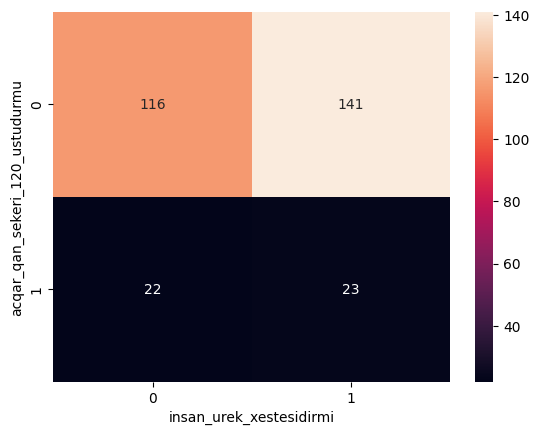

In [34]:
sns.heatmap(cross_tab, annot=True, fmt=',.0f')

In [35]:
df.head(3)

,yas,cinsiyyet,sine_agrisi,istirahet_halinda_qan_tezyiqi,xolesterol,acqar_qan_sekeri_120_ustudurmu,ritm_pozgunlugu_varmi,1_deqiqedeki_max_doyuntu_sayi,fiziki_fealiyyetle_bagli_angina,oldpeak,slope,fluoroskopiya_zamani_gorunen_damarlarin_sayi,stres_testi_neticesi,insan_urek_xestesidirmi
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


<Axes: xlabel='1_deqiqedeki_max_doyuntu_sayi', ylabel='Count'>

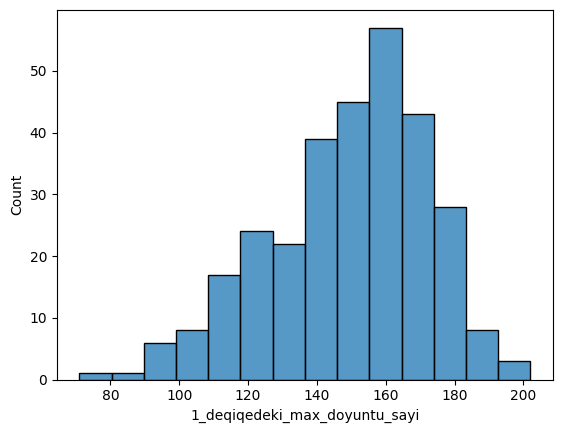

In [36]:
sns.histplot(df['1_deqiqedeki_max_doyuntu_sayi']) # maksimal urek doyuntusu sayi 1 deqiqede

In [37]:
df[df['1_deqiqedeki_max_doyuntu_sayi']<100]

,yas,cinsiyyet,sine_agrisi,istirahet_halinda_qan_tezyiqi,xolesterol,acqar_qan_sekeri_120_ustudurmu,ritm_pozgunlugu_varmi,1_deqiqedeki_max_doyuntu_sayi,fiziki_fealiyyetle_bagli_angina,oldpeak,slope,fluoroskopiya_zamani_gorunen_damarlarin_sayi,stres_testi_neticesi,insan_urek_xestesidirmi
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2,1
198,62,1,0,120,267,0,1,99,1,1.8,1,2,3,0
216,62,0,2,130,263,0,1,97,0,1.2,1,1,3,0
233,64,1,0,120,246,0,0,96,1,2.2,0,1,2,0
243,57,1,0,152,274,0,1,88,1,1.2,1,1,3,0
262,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0


In [38]:
df[df['1_deqiqedeki_max_doyuntu_sayi']>180]

,yas,cinsiyyet,sine_agrisi,istirahet_halinda_qan_tezyiqi,xolesterol,acqar_qan_sekeri_120_ustudurmu,ritm_pozgunlugu_varmi,1_deqiqedeki_max_doyuntu_sayi,fiziki_fealiyyetle_bagli_angina,oldpeak,slope,fluoroskopiya_zamani_gorunen_damarlarin_sayi,stres_testi_neticesi,insan_urek_xestesidirmi
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
32,44,1,1,130,219,0,0,188,0,0.0,2,0,2,1
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2,1
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1
57,45,1,0,115,260,0,0,185,0,0.0,2,0,2,1
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1,1
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
73,51,1,0,140,261,0,0,186,1,0.0,2,0,2,1
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2,1


In [39]:
df[df['1_deqiqedeki_max_doyuntu_sayi']>180]['yas']

,yas
1,37
32,44
44,39
56,48
57,45
62,52
65,35
72,29
73,51
78,52


In [40]:
df[df['1_deqiqedeki_max_doyuntu_sayi']>180]['yas'].max()

59

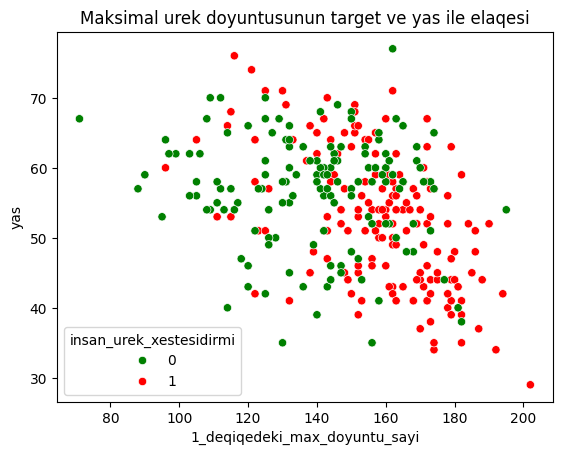

In [41]:
sns.scatterplot(x=df['1_deqiqedeki_max_doyuntu_sayi'], y=df['yas'], hue=df['insan_urek_xestesidirmi'], palette=['green','red'])
plt.title('Maksimal urek doyuntusunun target ve yas ile elaqesi')
plt.show()

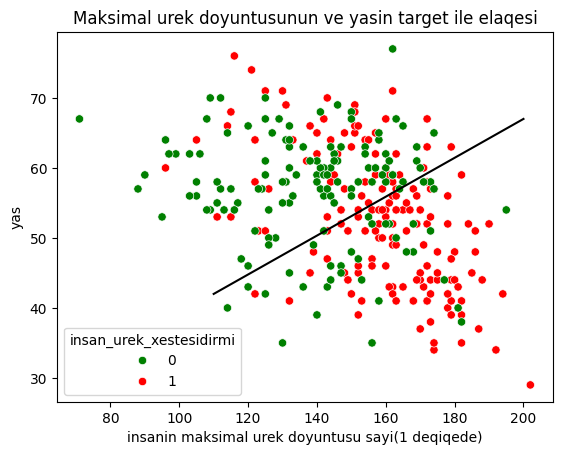

In [42]:
sns.scatterplot(x=df['1_deqiqedeki_max_doyuntu_sayi'], y=df['yas'], hue=df['insan_urek_xestesidirmi'], palette=['green','red'])
plt.xlabel('insanin maksimal urek doyuntusu sayi(1 deqiqede)')
plt.ylabel('yas')
plt.title('Maksimal urek doyuntusunun ve yasin target ile elaqesi')
plt.plot([110,200],[42,67], color='black')
plt.show()

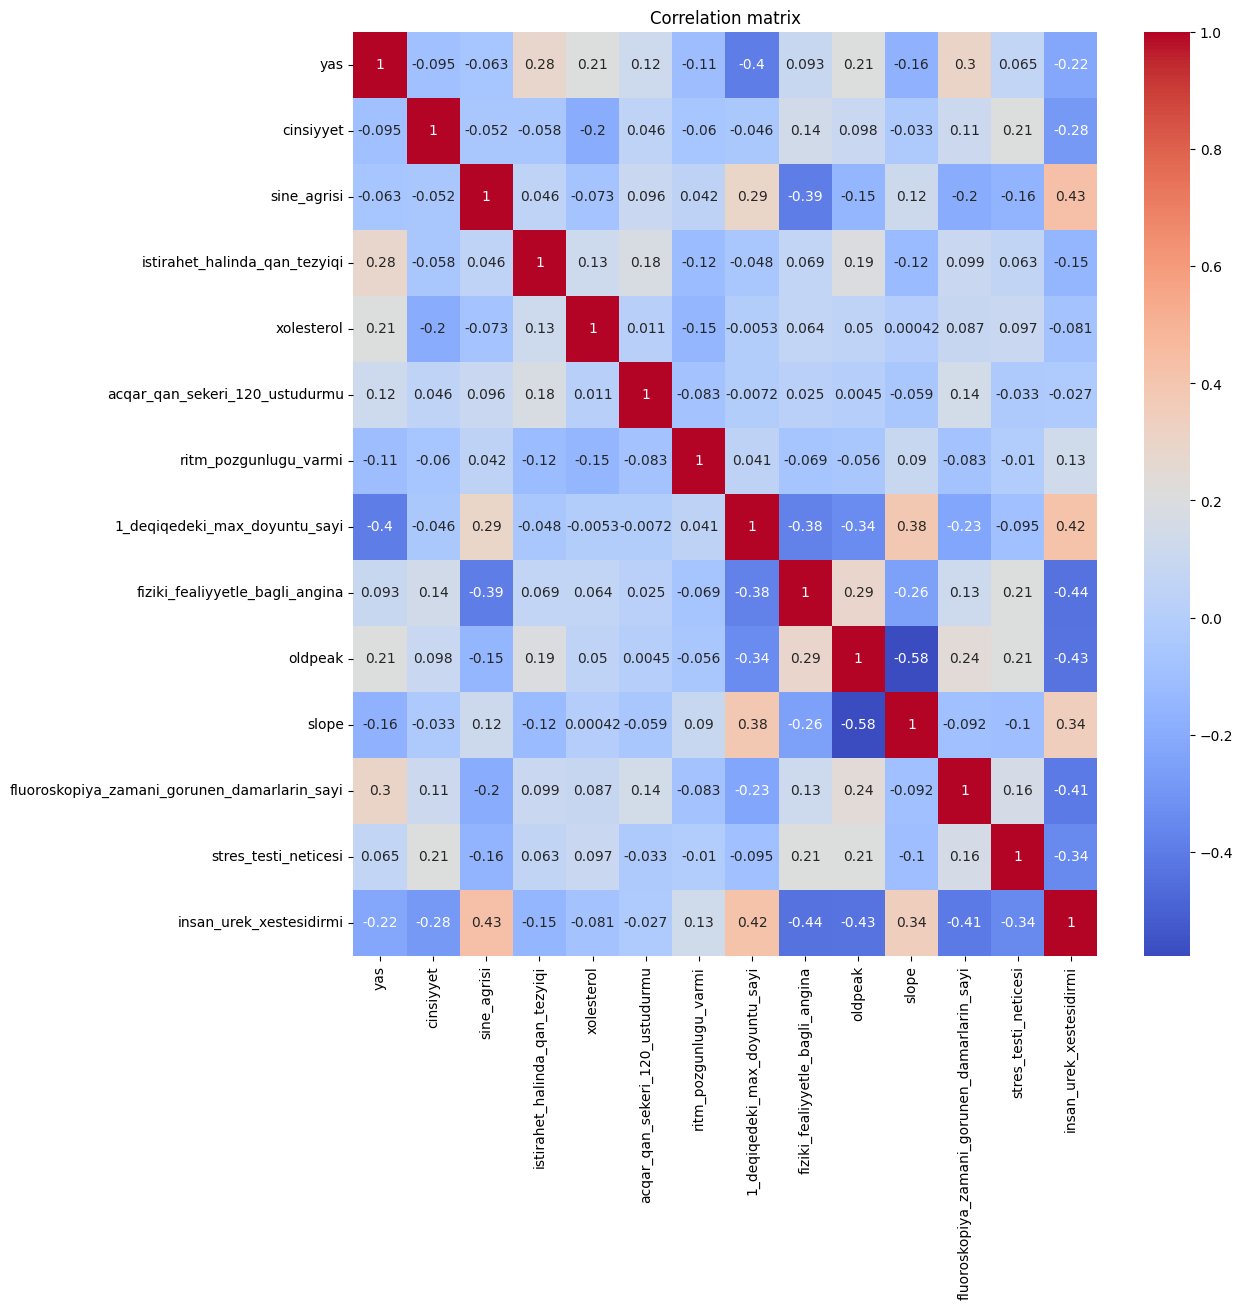

In [43]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm' )
plt.title('Correlation matrix')
plt.show()

In [44]:
df

,yas,cinsiyyet,sine_agrisi,istirahet_halinda_qan_tezyiqi,xolesterol,acqar_qan_sekeri_120_ustudurmu,ritm_pozgunlugu_varmi,1_deqiqedeki_max_doyuntu_sayi,fiziki_fealiyyetle_bagli_angina,oldpeak,slope,fluoroskopiya_zamani_gorunen_damarlarin_sayi,stres_testi_neticesi,insan_urek_xestesidirmi
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [45]:
x=df.drop('insan_urek_xestesidirmi',axis=1)
y=df['insan_urek_xestesidirmi']

In [46]:
from sklearn.model_selection import train_test_split

In [110]:
x_train, x_test, y_train, y_test= train_test_split(x,y,train_size=0.7, random_state=101)

In [111]:
from sklearn.preprocessing import MinMaxScaler

In [112]:
scaler=MinMaxScaler()
x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report,confusion_matrix

In [114]:
def modeli_qur_ve_overfit_yoxla(class_parametri_ile):
  model=class_parametri_ile
  model.fit(x_train_scaled, y_train)
  y_predict_test=model.predict(x_test_scaled)
  print(classification_report(y_test, y_predict_test))
  y_predict_train=model.predict(x_train_scaled)
  print(classification_report(y_train, y_predict_train))

In [115]:
modeli_qur_ve_overfit_yoxla(LogisticRegression(penalty='l2', C=0.1, solver='newton-cg', random_state=13))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79        43
           1       0.78      0.94      0.85        48

    accuracy                           0.82        91
   macro avg       0.84      0.82      0.82        91
weighted avg       0.84      0.82      0.82        91

              precision    recall  f1-score   support

           0       0.85      0.74      0.79        95
           1       0.81      0.90      0.85       116

    accuracy                           0.82       211
   macro avg       0.83      0.82      0.82       211
weighted avg       0.83      0.82      0.82       211



In [116]:
modeli_qur_ve_overfit_yoxla(SVC(kernel='linear', C=0.1, gamma=0.1, random_state=13))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79        43
           1       0.78      0.94      0.85        48

    accuracy                           0.82        91
   macro avg       0.84      0.82      0.82        91
weighted avg       0.84      0.82      0.82        91

              precision    recall  f1-score   support

           0       0.88      0.74      0.80        95
           1       0.81      0.91      0.86       116

    accuracy                           0.83       211
   macro avg       0.84      0.83      0.83       211
weighted avg       0.84      0.83      0.83       211



In [117]:
modeli_qur_ve_overfit_yoxla(SVC(kernel='rbf', C=0.1, gamma=0.1))

              precision    recall  f1-score   support

           0       1.00      0.47      0.63        43
           1       0.68      1.00      0.81        48

    accuracy                           0.75        91
   macro avg       0.84      0.73      0.72        91
weighted avg       0.83      0.75      0.73        91

              precision    recall  f1-score   support

           0       0.90      0.40      0.55        95
           1       0.66      0.97      0.79       116

    accuracy                           0.71       211
   macro avg       0.78      0.68      0.67       211
weighted avg       0.77      0.71      0.68       211



In [118]:
modeli_qur_ve_overfit_yoxla(DecisionTreeClassifier(max_depth=3,criterion='entropy'))

              precision    recall  f1-score   support

           0       0.75      0.56      0.64        43
           1       0.68      0.83      0.75        48

    accuracy                           0.70        91
   macro avg       0.71      0.70      0.69        91
weighted avg       0.71      0.70      0.70        91

              precision    recall  f1-score   support

           0       0.88      0.74      0.80        95
           1       0.81      0.91      0.86       116

    accuracy                           0.83       211
   macro avg       0.84      0.83      0.83       211
weighted avg       0.84      0.83      0.83       211



In [119]:
modeli_qur_ve_overfit_yoxla(RandomForestClassifier(n_estimators=100,max_depth=5,criterion='entropy'))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84        43
           1       0.82      0.94      0.87        48

    accuracy                           0.86        91
   macro avg       0.87      0.85      0.85        91
weighted avg       0.86      0.86      0.86        91

              precision    recall  f1-score   support

           0       0.95      0.92      0.93        95
           1       0.93      0.96      0.94       116

    accuracy                           0.94       211
   macro avg       0.94      0.94      0.94       211
weighted avg       0.94      0.94      0.94       211



In [120]:
modeli_qur_ve_overfit_yoxla(KNeighborsClassifier(n_neighbors=5))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80        43
           1       0.83      0.81      0.82        48

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

              precision    recall  f1-score   support

           0       0.84      0.87      0.86        95
           1       0.89      0.86      0.88       116

    accuracy                           0.87       211
   macro avg       0.87      0.87      0.87       211
weighted avg       0.87      0.87      0.87       211



In [127]:
model=SVC(kernel='linear', C=0.1, gamma=0.1, random_state=13, probability=True)
model.fit(x_train_scaled, y_train)
y_predict_test=model.predict(x_test_scaled)
print(classification_report(y_test, y_predict_test))
y_predict_train=model.predict(x_train_scaled)
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79        43
           1       0.78      0.94      0.85        48

    accuracy                           0.82        91
   macro avg       0.84      0.82      0.82        91
weighted avg       0.84      0.82      0.82        91

              precision    recall  f1-score   support

           0       0.88      0.74      0.80        95
           1       0.81      0.91      0.86       116

    accuracy                           0.83       211
   macro avg       0.84      0.83      0.83       211
weighted avg       0.84      0.83      0.83       211



In [128]:
confusion_matrix(y_train, y_predict_train)

array([[ 70,  25],
       [ 10, 106]])

In [129]:
confusion_matrix(y_test,y_predict_test)

array([[30, 13],
       [ 3, 45]])

<Axes: >

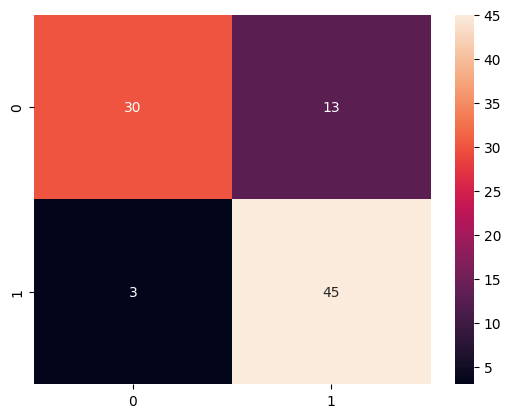

In [130]:
sns.heatmap(confusion_matrix(y_test,y_predict_test), annot=True)

In [131]:
y_predicted=model.predict_proba(x_test_scaled)[:,1]

In [132]:
y_predicted

array([0.90228378, 0.89409004, 0.65353583, 0.94793593, 0.03769649,
       0.85530744, 0.88184513, 0.03351025, 0.10492557, 0.85370237,
       0.16284151, 0.78035724, 0.7064755 , 0.24365121, 0.92839646,
       0.78814974, 0.97040552, 0.49294662, 0.78649274, 0.11549451,
       0.05915243, 0.24713298, 0.49317501, 0.16557891, 0.08068167,
       0.92459314, 0.03310871, 0.84742497, 0.0410428 , 0.89845298,
       0.02796055, 0.55770906, 0.87033815, 0.52102867, 0.94567151,
       0.369077  , 0.87084908, 0.69687192, 0.89081231, 0.94280603,
       0.13195817, 0.89205511, 0.94199606, 0.76784023, 0.03513863,
       0.66818041, 0.71835172, 0.94387686, 0.98088355, 0.1573396 ,
       0.03262971, 0.38816594, 0.25815341, 0.10055186, 0.78918144,
       0.23830514, 0.10932566, 0.97864436, 0.93669771, 0.73103756,
       0.88263668, 0.76024997, 0.11503826, 0.90925389, 0.59058922,
       0.10172169, 0.90303764, 0.64702708, 0.95191148, 0.85045406,
       0.95247291, 0.52266945, 0.86826935, 0.28141616, 0.98134

In [133]:
from sklearn.metrics import roc_curve
fpr, tpr, threshols= roc_curve(y_test, y_predicted)

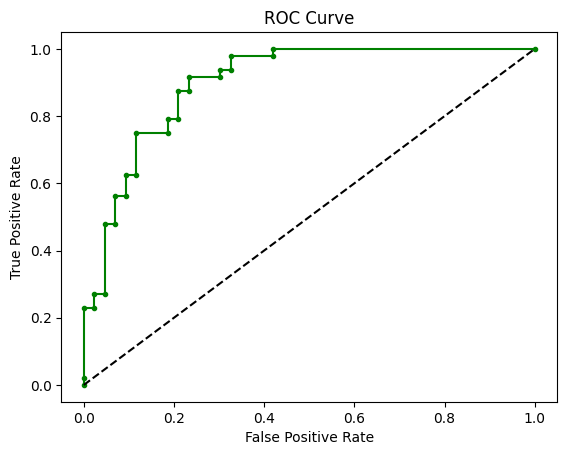

In [134]:
plt.plot(fpr, tpr, marker=".", color='green')
plt.plot([0,1],[0,1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [135]:

from sklearn.metrics import roc_auc_score

In [136]:

auc=roc_auc_score(y_test, y_predicted)
auc

0.8997093023255813

In [137]:
round(auc,2)

0.9

In [138]:
df

,yas,cinsiyyet,sine_agrisi,istirahet_halinda_qan_tezyiqi,xolesterol,acqar_qan_sekeri_120_ustudurmu,ritm_pozgunlugu_varmi,1_deqiqedeki_max_doyuntu_sayi,fiziki_fealiyyetle_bagli_angina,oldpeak,slope,fluoroskopiya_zamani_gorunen_damarlarin_sayi,stres_testi_neticesi,insan_urek_xestesidirmi
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [139]:
# her hansi datani yoxlayaq

In [97]:
df.sample()

,yas,cinsiyyet,sine_agrisi,istirahet_halinda_qan_tezyiqi,xolesterol,acqar_qan_sekeri_120_ustudurmu,ritm_pozgunlugu_varmi,1_deqiqedeki_max_doyuntu_sayi,fiziki_fealiyyetle_bagli_angina,oldpeak,slope,fluoroskopiya_zamani_gorunen_damarlarin_sayi,stres_testi_neticesi,insan_urek_xestesidirmi
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2,0


In [140]:
model.predict(scaler.transform([[61,	1	,3,	134,	234,	0,	1,	145,	0,	2.6,	1,	2,	2]]))[0] #sehv

1

In [141]:
model.predict(scaler.transform([[	37,	1,	2,	130,	250,	0,	1,	187,	0,	3.5,	0,	0,	2	]]))[0] #dogru

1

In [142]:
model.predict(scaler.transform([[21,	1,	0	,120,	241,	1,	0,	142,	0,	0.2,	1,	3,	3]]))[0] #dogru

0

In [143]:
model.predict(scaler.transform([[57,	1,	0,	130,	131,	0,	1,	115,	1,	1.2,	1,	1,	3]]))[0] #dogru

0